In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | biloela
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | gat
Processing Record 7 of Set 1 | bocaranga
City not found. Skipping...
Processing Record 8 of Set 1 | boguchar
Processing Record 9 of Set 1 | ambilobe
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | atar
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | serang
Processing Record 16 of Set 1 | praia
Processing Record 17 of Set 1 | amapa
Processing Record 18 of Set 1 | svetlogorsk
Processing Record 19 of Set 1 | savonlinna
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | santa ines
Processing Record 24 of Set 1 | taolanaro
City no

Processing Record 42 of Set 4 | antsohihy
Processing Record 43 of Set 4 | saint-augustin
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | bacungan
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | srandakan
Processing Record 48 of Set 4 | glendive
Processing Record 49 of Set 4 | shache
Processing Record 50 of Set 4 | sao felix do xingu
Processing Record 1 of Set 5 | sturgis
Processing Record 2 of Set 5 | saint-francois
Processing Record 3 of Set 5 | urusha
Processing Record 4 of Set 5 | puerto del rosario
Processing Record 5 of Set 5 | saint-prosper
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | sept-iles
Processing Record 9 of Set 5 | miri
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | kavaratti
Processing Record 12 of Set 5 | tarudant
City not found. Skipping...
Processing Record 13 of Set 5 | broken hill
Processing Re

Processing Record 30 of Set 8 | bischheim
Processing Record 31 of Set 8 | avarua
Processing Record 32 of Set 8 | de-kastri
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | srednekolymsk
Processing Record 35 of Set 8 | boca do acre
Processing Record 36 of Set 8 | fajardo
Processing Record 37 of Set 8 | baghdad
Processing Record 38 of Set 8 | vanavara
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | mtwara
Processing Record 41 of Set 8 | taga dzong
City not found. Skipping...
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | mocambique
City not found. Skipping...
Processing Record 44 of Set 8 | port hardy
Processing Record 45 of Set 8 | bojnurd
Processing Record 46 of Set 8 | mukhen
Processing Record 47 of Set 8 | shangzhi
Processing Record 48 of Set 8 | lukovetskiy
Processing Record 49 of Set 8 | mahanoro
Processing Record 50 of Set 8 | laguna
Processing Record 1 of Set 9 | buariki
City n

Processing Record 16 of Set 12 | milkovo
Processing Record 17 of Set 12 | killybegs
Processing Record 18 of Set 12 | ngunguru
Processing Record 19 of Set 12 | sagua la grande
Processing Record 20 of Set 12 | pisco
Processing Record 21 of Set 12 | tongliao
Processing Record 22 of Set 12 | maragogi
Processing Record 23 of Set 12 | rawah
Processing Record 24 of Set 12 | lasa
Processing Record 25 of Set 12 | highland village
Processing Record 26 of Set 12 | esna
Processing Record 27 of Set 12 | ituni
City not found. Skipping...
Processing Record 28 of Set 12 | kurilsk
Processing Record 29 of Set 12 | bhind
Processing Record 30 of Set 12 | buin
Processing Record 31 of Set 12 | dzilam gonzalez
Processing Record 32 of Set 12 | aleksandrov gay
Processing Record 33 of Set 12 | bayir
Processing Record 34 of Set 12 | poum
Processing Record 35 of Set 12 | neuquen
Processing Record 36 of Set 12 | kodinsk
Processing Record 37 of Set 12 | buraydah
Processing Record 38 of Set 12 | jojoima
Processing R

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,61.52,67,13,12.68,PT,2021-11-30 05:19:25
1,Yellowknife,62.4560,-114.3525,-18.58,78,1,1.99,CA,2021-11-30 05:19:26
2,Biloela,-24.4167,150.5000,81.27,69,98,13.44,AU,2021-11-30 05:19:26
3,Rikitea,-23.1203,-134.9692,76.57,79,6,20.20,PF,2021-11-30 05:19:26
4,Dikson,73.5069,80.5464,-12.62,96,100,12.33,RU,2021-11-30 05:19:26
5,Gat,31.6100,34.7642,73.40,27,33,6.42,IL,2021-11-30 05:19:27
6,Boguchar,49.9358,40.5450,49.84,83,100,16.73,RU,2021-11-30 05:19:27
7,Ambilobe,-13.2000,49.0500,82.60,58,7,7.18,MG,2021-11-30 05:19:27
8,Albany,42.6001,-73.9662,24.67,82,11,4.29,US,2021-11-30 05:15:09
9,Ilulissat,69.2167,-51.1000,26.82,85,100,7.49,GL,2021-11-30 05:19:28


In [8]:
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-30 05:19:25,38.5167,-28.7000,61.52,67,13,12.68
1,Yellowknife,CA,2021-11-30 05:19:26,62.4560,-114.3525,-18.58,78,1,1.99
2,Biloela,AU,2021-11-30 05:19:26,-24.4167,150.5000,81.27,69,98,13.44
3,Rikitea,PF,2021-11-30 05:19:26,-23.1203,-134.9692,76.57,79,6,20.20
4,Dikson,RU,2021-11-30 05:19:26,73.5069,80.5464,-12.62,96,100,12.33
...,...,...,...,...,...,...,...,...,...
550,Byron Bay,AU,2021-11-30 05:32:57,-28.6500,153.6167,71.55,95,100,4.03
551,Thyolo,MW,2021-11-30 05:33:35,-16.0678,35.1405,78.82,35,21,0.47
552,Muravlenko,RU,2021-11-30 05:33:36,63.7898,74.5230,-5.87,96,82,11.90
553,Bac Lieu,VN,2021-11-30 05:33:36,9.2850,105.7244,82.54,78,97,12.35


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

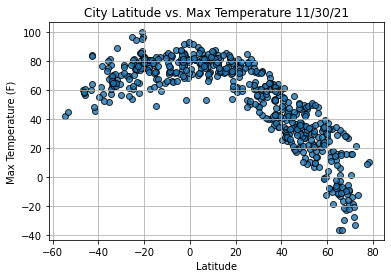

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

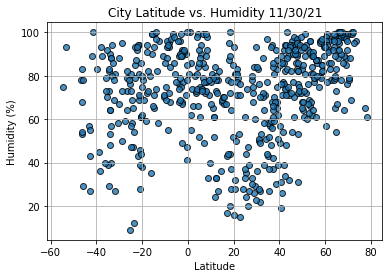

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

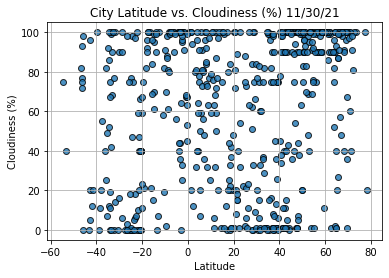

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

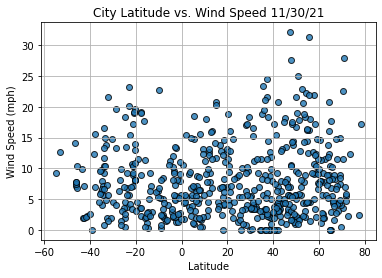

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()